# Predicting the survival of people using Machine Learning

## 1. Problem defition

> How well we can ans the question : “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## 2. Data

> The data is downloaded from the Kaggle Titanic - Machine Learning from Disaster competition: https://www.kaggle.com/c/titanic/data

## Exploratory Data Analysis

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/train.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
pd.crosstab(data['Survived'],data['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


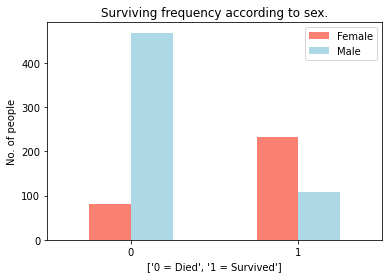

In [8]:
pd.crosstab(data['Survived'],data['Sex']).plot(kind = 'bar',color = ['salmon', 'lightblue'])

plt.title('Surviving frequency according to sex.')
plt.xlabel(['0 = Died','1 = Survived'])
plt.ylabel('No. of people')
plt.legend(['Female','Male'])
plt.xticks(rotation = 0);

In [9]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


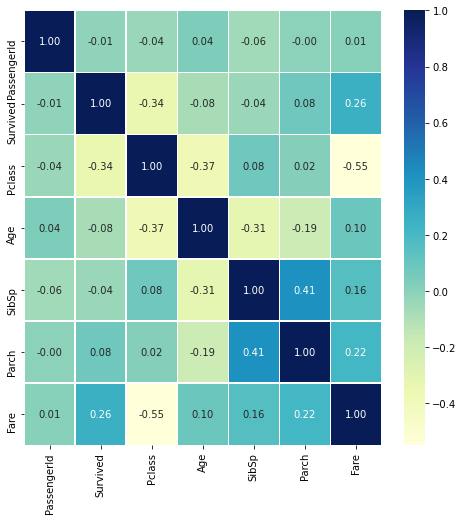

In [10]:
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(data.corr(),linewidths = 0.5, annot = True,
                 cmap = 'YlGnBu',fmt = '.2F');

In [11]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Model Making

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [14]:
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(data[features])
y = data['Survived']

In [15]:
models = {'LogisticRegression' : LogisticRegression(),
          'Linear_svm' : SGDClassifier(),
          'KNN': KNeighborsClassifier(),
          'RandomForestClassifier' : RandomForestClassifier()}

In [16]:
def fit_and_score(models,X_train,y_train,X_test,y_test):
    '''
    Fits and evaluate given machine learning model.
    
    Parameters:-
    models = Take a dictionary of models to fit and evaluate.
    X_train = Training data without labels.
    y_train = Training labels.
    X_test = Test data without labels.
    y_test = Test labels
    '''
    np.random.seed(21)
    model_scores = {}
    for model_name, model in models.items():
        print(f'fitting {model_name}......')
        model.fit(X_train,y_train)
        print(f'Evaluating {model_name}......')
        model_scores[model_name] = model.score(X_test,y_test)

    return model_scores

In [17]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2, random_state = 21)
scores = fit_and_score(models,X_train,y_train,X_valid,y_valid)

fitting LogisticRegression......
Evaluating LogisticRegression......
fitting Linear_svm......
Evaluating Linear_svm......
fitting KNN......
Evaluating KNN......
fitting RandomForestClassifier......
Evaluating RandomForestClassifier......


In [18]:
scores

{'LogisticRegression': 0.7988826815642458,
 'Linear_svm': 0.7094972067039106,
 'KNN': 0.7653631284916201,
 'RandomForestClassifier': 0.8044692737430168}

In [19]:
model_compare = pd.DataFrame(scores,index=['accuracy'])
model_compare

,LogisticRegression,Linear_svm,KNN,RandomForestClassifier
accuracy,0.798883,0.709497,0.765363,0.804469


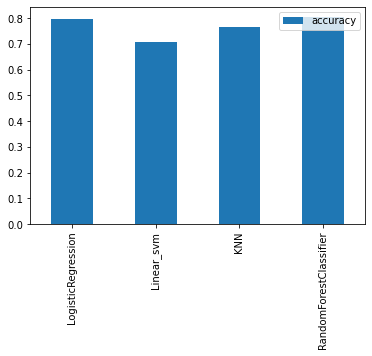

In [20]:
model_compare.T.plot.bar();

## Baseline Model

In [21]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
model.score(X_valid,y_valid)

0.8044692737430168

## Hyperparamter Tuning with GridSearchCV

Since our RandomForestClassifier model provides the best scores so far, we'll try and improve them using GridSearchCV...

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
param_grid = {'n_estimators' : [10,50,100],
              'max_depth' : [5,30],
              'max_features' : ['auto','sqrt'],
              'min_samples_split' : [4],
              'min_samples_leaf' : [2,4]}

In [24]:
gs_model = GridSearchCV(estimator=model,
                            param_grid=param_grid,
                            cv=5, verbose=2)
gs_model.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=5, max_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_sampl

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, m

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    7.7s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 30], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 4], 'min_samples_split': [4],
                         'n_estimators': [10, 50, 100]},
             verbose=2)

In [25]:
gs_model.score(X_valid,y_valid)

0.8100558659217877

In [26]:
gs_model.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 100}

In [27]:
final_model = RandomForestClassifier(max_depth = 5,max_features = 'auto',
                                     min_samples_leaf = 2,min_samples_split = 4,
                                     n_estimators = 100)
final_model.fit(X_train,y_train)
final_model.score(X_valid,y_valid)

0.8156424581005587

## Making Predictions on test data

In [28]:
test_data = pd.read_csv('data/test.csv')

features = ["Pclass", "Sex", "SibSp", "Parch"]
X_test = pd.get_dummies(test_data[features])

predictions = final_model.predict(X_test)

prediction_frame = pd.DataFrame({'PassengerId': test_data['PassengerId'],
                                 'Survived' : predictions})

prediction_frame.to_csv('submission_file.csv',index = False)

print('submission_file successfully saved')

submission_file successfully saved
